# Análisis de Clustering usando K-Means y DBSCAN

En esta tarea, se ha generado un conjunto de datos artificialmente en dos dimensiones. Los datos están distribuidos en tres grupos centrados alrededor de los puntos (0, 0), (1, 2) y (2, 0). Posteriormente, aplicaremos los algoritmos de clustering **K-Means** y **DBSCAN** para agrupar los datos y visualizarlos.



## 1. Lectura de los datos desde un archivo CSV

Comenzamos leyendo el archivo `points.csv` para obtener las coordenadas de los puntos.


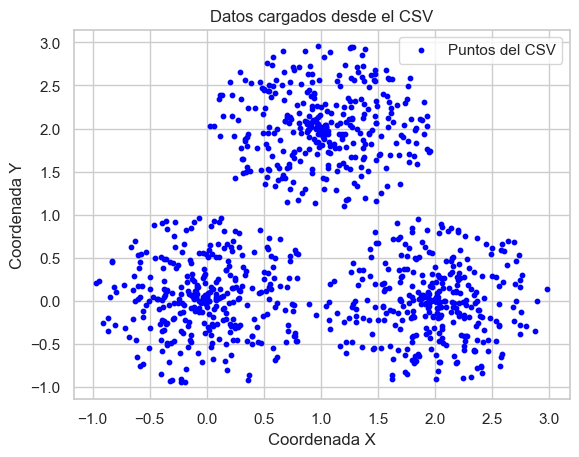

In [3]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de Seaborn
sns.set(style='whitegrid', palette='muted')


# Lectura de los datos desde el archivo CSV
data = pd.read_csv('points.csv')

# Convertimos los datos a un array de NumPy para trabajar con ellos
X = data[['Coordinate X', 'Coordinate Y']].values

# Visualizamos los primeros datos para verificar que se cargaron correctamente
data.head()

# Visualizamos los puntos generados
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', label='Puntos del CSV')
plt.title('Datos cargados desde el CSV')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.show()

## 2. Aplicación del algoritmo K-Means

Aplicamos el algoritmo K-Means para agrupar los puntos en tres clusters.


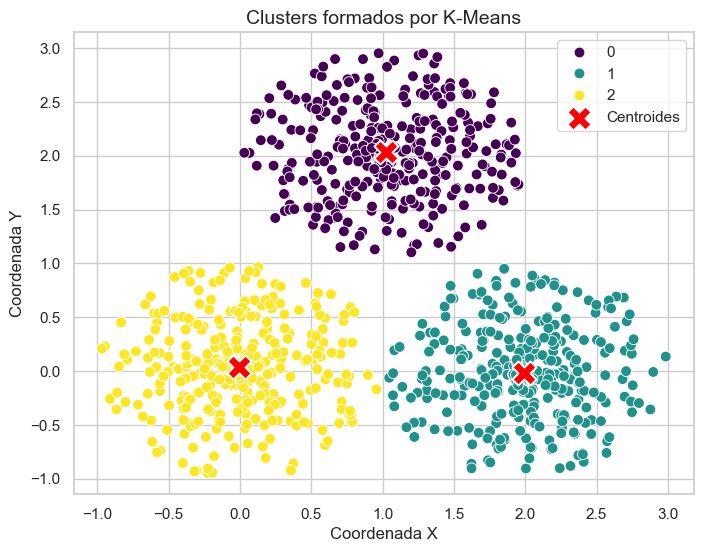

In [9]:
from sklearn.cluster import KMeans

# Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Visualización de los clusters formados por K-Means con Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_kmeans, palette='viridis', s=60, legend='full')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                s=300, color='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-Means", fontsize=14)
plt.xlabel("Coordenada X", fontsize=12)
plt.ylabel("Coordenada Y", fontsize=12)
plt.legend()
plt.show()


## 3. Aplicación del algoritmo DBSCAN

Aplicamos el algoritmo DBSCAN para identificar clusters basados en la densidad.


Clusters encontrados: 3
Puntos de ruido: 0


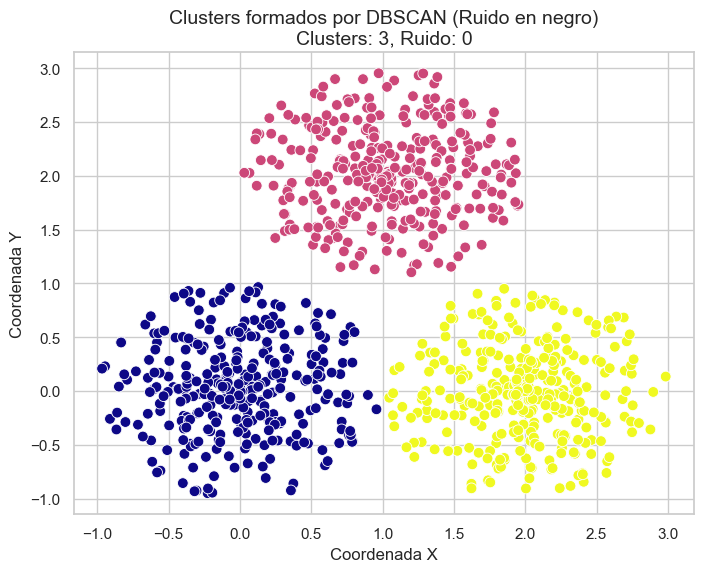

In [122]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicación del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.58, min_samples=140)
labels_dbscan = dbscan.fit_predict(X)

# Revisamos cuántos puntos se marcaron como ruido
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f"Clusters encontrados: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

# Visualización de los clusters formados por DBSCAN
plt.figure(figsize=(8, 6))
# Los puntos con etiqueta -1 se consideran ruido y se colorean en negro
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_dbscan, palette='plasma', s=60, legend=None)
plt.title(f"Clusters formados por DBSCAN (Ruido en negro)\nClusters: {n_clusters}, Ruido: {n_noise}", fontsize=14)
plt.xlabel("Coordenada X", fontsize=12)
plt.ylabel("Coordenada Y", fontsize=12)
plt.show()
